# Data Inspection, Cleaning, and EDA

In this project, I will build a supervised regression classifier in order to predict medical costs. The variables used are age, sex, bmi, number of children, smoker, and region. The target variable is charges.

### Start with usual imports and data inspection

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('../insurance.csv')
df.sample(10)

,age,sex,bmi,children,smoker,region,charges
1069,54,female,31.900,1,no,southeast,10928.84900
605,51,female,34.100,0,no,southeast,9283.56200
1280,48,female,33.330,0,no,southeast,8283.68070
503,19,male,30.250,0,yes,southeast,32548.34050
637,35,female,38.095,2,no,northeast,24915.04626
613,34,female,19.000,3,no,northeast,6753.03800
322,34,male,30.800,0,yes,southwest,35491.64000
519,31,male,30.875,0,no,northeast,3857.75925
818,47,female,26.125,1,yes,northeast,23401.30575
134,20,female,28.785,0,no,northeast,2457.21115


In [4]:
# Examine the sahpe of the data
df.shape

(1338, 7)

In [5]:
# Examine the cardinality of the data
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [6]:
print(len(df['age'].unique()), len(df['bmi'].unique()), len(df['children'].unique()))

47 548 6


In [7]:
# Check variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


There are two numerical dependent variables (bmi and age) and one numerical target variable (charges), and four categorical variables (sex, children, smoker, and region).

### Data cleaning

In [8]:
# Check for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

At first glance it appears that there are no null values. There is no need to do any data cleaning.

Numerical data appears to already be integer or float types.

There is no need to do any data cleaning.

## Exploratory Data Analysis

### Visualize the data

Now, I will create histograms for each variable.

<AxesSubplot:xlabel='age', ylabel='Count'>

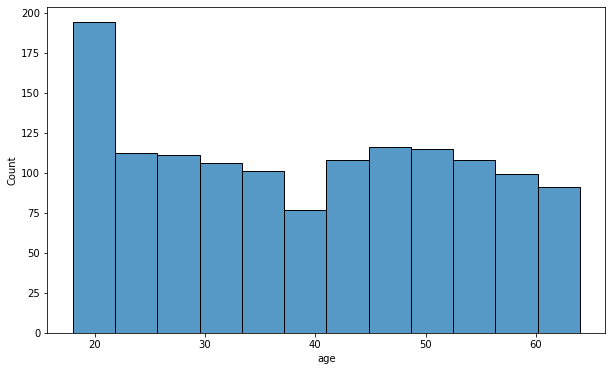

In [9]:
# Age
plt.figure(figsize=(10,6))
sns.histplot(df.age)

<AxesSubplot:xlabel='sex', ylabel='Count'>

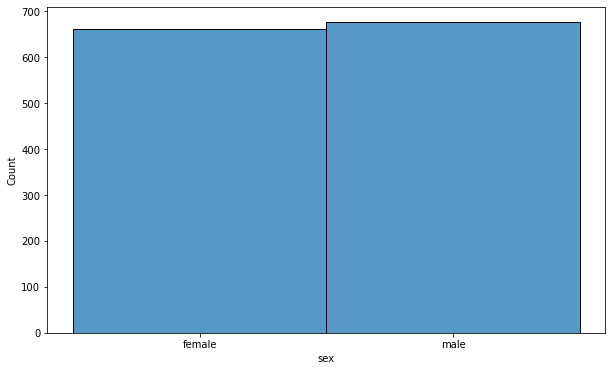

In [11]:
# Sex
plt.figure(figsize=(10,6))
sns.histplot(df.sex)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

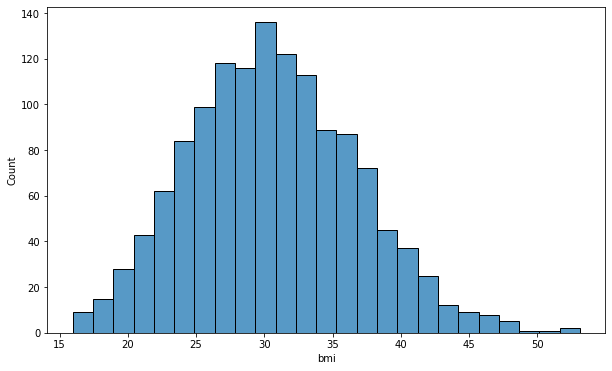

In [12]:
# Graph the charges
plt.figure(figsize=(10,6))
sns.histplot(df.bmi)

<AxesSubplot:xlabel='children', ylabel='Count'>

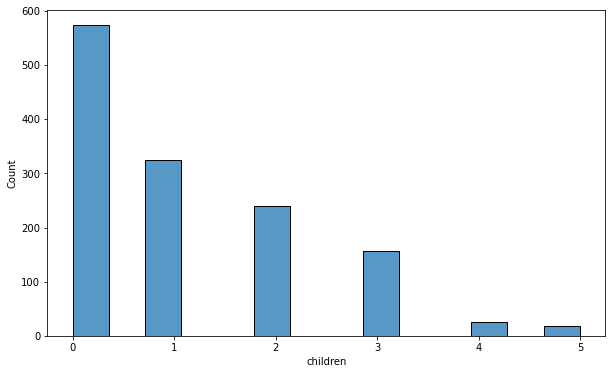

In [14]:
# Children
plt.figure(figsize=(10,6))
sns.histplot(df.children)

<AxesSubplot:xlabel='region', ylabel='Count'>

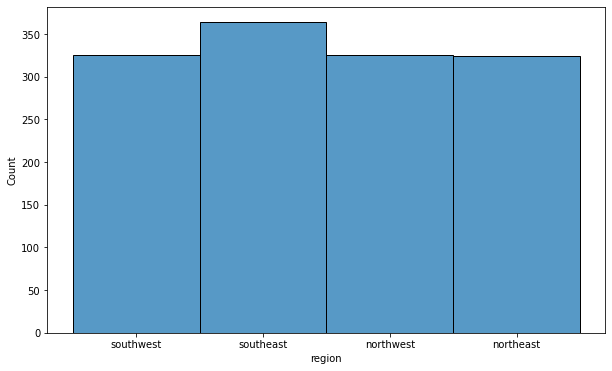

In [15]:
# Region
plt.figure(figsize=(10,6))
sns.histplot(df.region)

<AxesSubplot:xlabel='charges', ylabel='Count'>

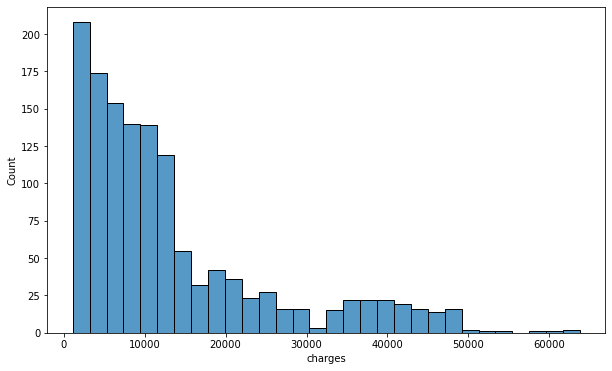

In [13]:
# Charges
plt.figure(figsize=(10,6))
sns.histplot(df.charges)

It looks like there are no outliers.

<AxesSubplot:>

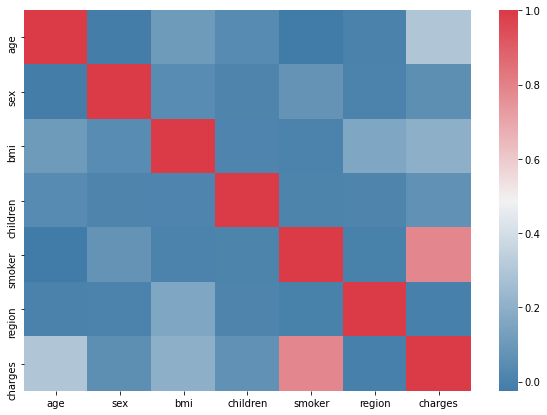

In [22]:
# Encode non-numerical categorical variables (sex, smoker, region) and create heatmap of all variables.
le = LabelEncoder()

le.fit(df.sex)
df.sex = le.transform(df.sex)

le.fit(df.smoker)
df.smoker = le.transform(df.smoker)

le.fit(df.region)
df.region = le.transform(df.region)

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(240,10,as_cmap=True))

Below, I will take a look at the smoker data in more detail.

<AxesSubplot:xlabel='charges', ylabel='Count'>

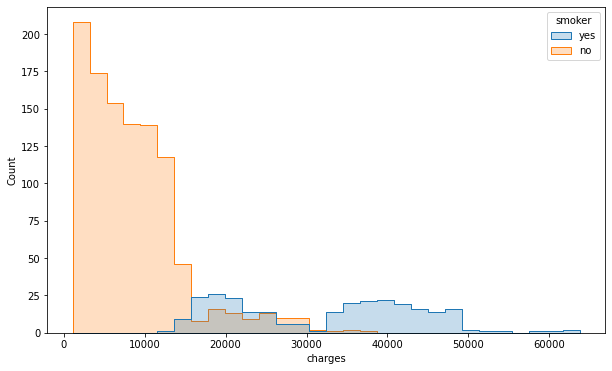

In [17]:
# Graph charges by smoker.
plt.figure(figsize=(10, 6))
sns.histplot(x=df.charges, hue=df.smoker, element='step')

Smokers make up the majority of higher charges, accounting for more than half of the charges above $15,000.

/Users/nicholaslenczewski/opt/anaconda3/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

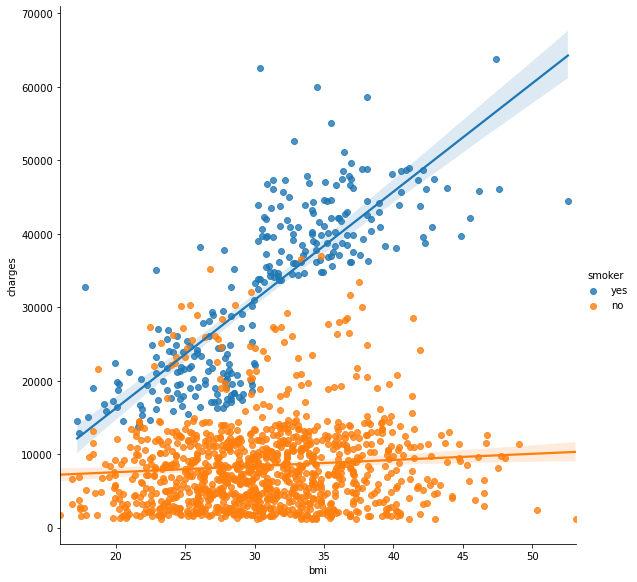

In [19]:
# Graph charges against bmi and smoker.
plt.figure(figsize=(10, 6))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df, size=8)

Smokers definitely pay more in charges.

In [28]:
# Save the dataframe for pre-processing
%store df

Stored 'df' (DataFrame)
